<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS11_TG19_Yuma_Akhunza_K_P_2341720259.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS11 - Classification 2**

Nama : Yuma Akhunza Kausar Putra

NIM : 2341720259

Absen : 19



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lab 1**
> SVM Classification with Linear Dummy Data

**Pengantar**

Pada praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis dari luaran metode SVM yang dijalankan. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai serta karakteristik yang sesuai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan SVM.

## Step 1 - Import Library

In [11]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Step 2 - Membuat Data Dummy

Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

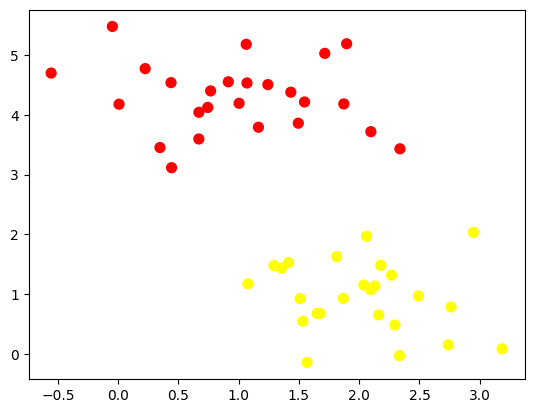

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

## Langkah 4 - Ilustrasi Margin

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

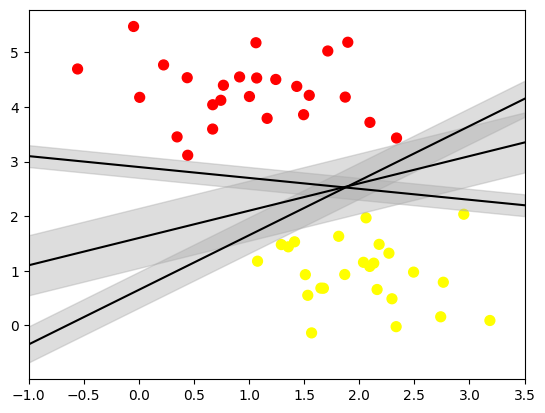

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

## Langkah 5 - Fitting Model

Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [14]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [15]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

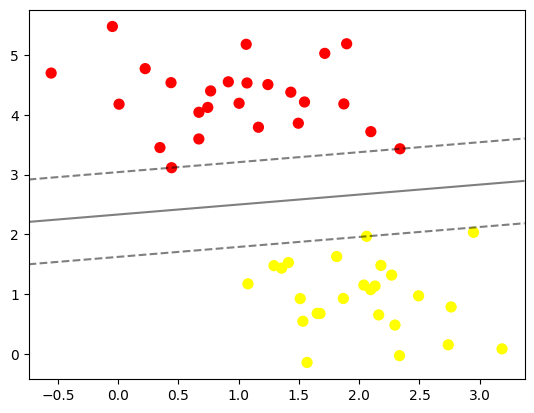

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Didapatkan titik,

In [ ]:
array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

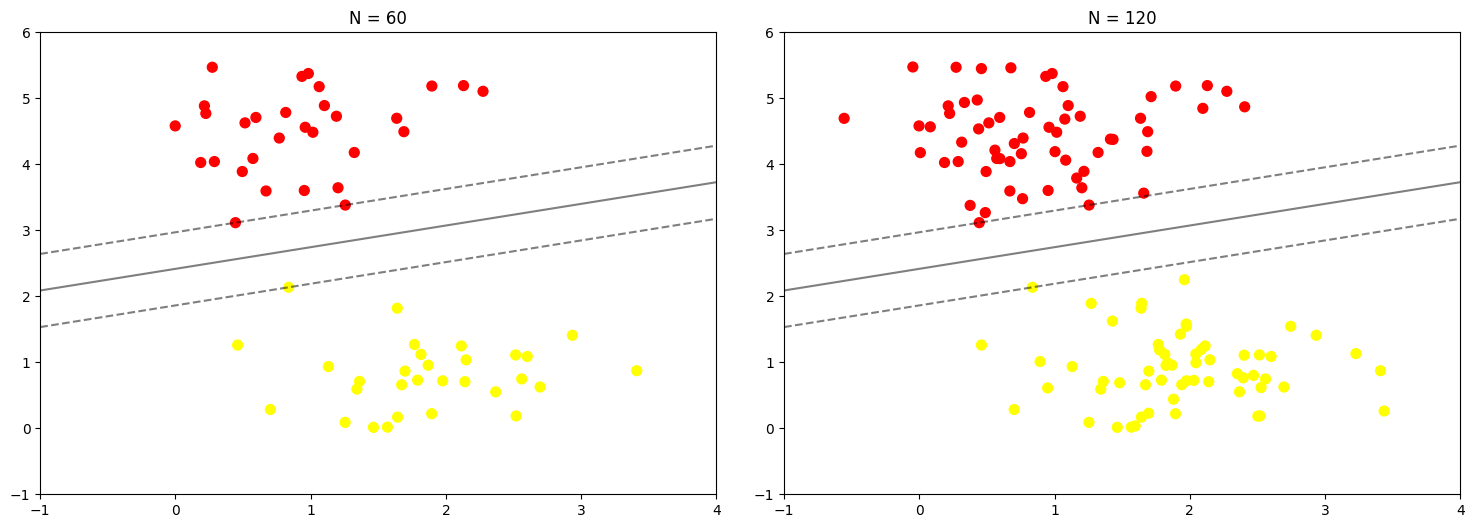

In [19]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

In [20]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

NB: Kode mungkin tidak dapat dijalankan pada Google Colab. Lakukan instalasi modul ipywidgets terlebih dahulu

In [9]:
!pip install ipywidgets

# **Lab 2**

> SVM Classification with Non-Linear Dummy Data

**Pengantar**

Pada praktikum ke-2 ini, kita akan mencoba memanfaatkan SVM untuk mengklasifiaksikan data dengan distribusi non-linier. Dengan menggunakan kernel trick, SVM juga mampu membuat decision boundaries pada data non-linier.

## Langkah 1 - Ilustrasi Data Non-Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

## Step 1a - Import Library

In [21]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

## Langkah 1b - Buat Kembali Fungsi Plotting

In [22]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 1c - Buat Data Dummy Non-Linier

Hasilnya,

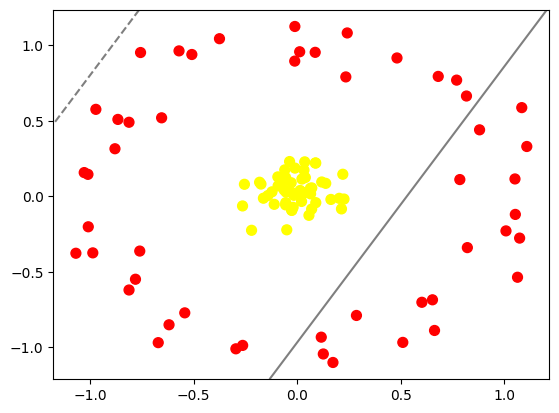

In [23]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial. Definisikan fungsi radial dalam kode.

In [24]:
r = np.exp(-(X**2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [25]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.0636296 ,  0.04235054],
       [ 0.08917305, -0.04143143],
       [-1.01099912,  0.14612032],
       [ 0.21317815, -0.08278014],
       [ 0.87997222,  0.44103347],
       [ 0.78462412,  0.11153799],
       [ 0.08700864,  0.22113175],
       [ 0.03584355,  0.0249021 ],
       [-0.26453502, -0.06317949],
       [ 1.06326208, -0.53557551],
       [-0.25541592,  0.08025898],
       [ 1.08371483,  0.5880916 ],
       [ 0.06982603,  0.0562901 ],
       [-0.16375251, -0.01207408],
       [-0.2639878 , -0.98701312],
       [-0.05442568,  0.0289145 ],
       [ 0.76924421,  0.77031148],
       [ 0.05611988, -0.12528341],
       [ 0.2410463 ,  1.08282241],
       [-0.1821779 ,  0.09376997],
       [ 1.10802603,  0.33066706],
       [ 0.06332741,  0.05369476],
       [-0.01142523,  0.18746382],
       [-0.09279773,  0.06982477],
       [-0.8127269 ,  0.49118602],
       [-1.02895464,  0.15789235],
       [ 1.05261917, -0.11932902],
       [ 0.50929642, -0.967131  ],
       [ 0.66247946, -0.88809485],
       [-0.01715036,  0.00732828],
       [-0.17556993,  0.08175018],
       [-1.06915202, -0.376561  ],
       [ 0.20256646, -0.01273634],
       [ 1.0074815 , -0.22844707],
       [-0.12246811,  0.03028847],
       [-0.65521705,  0.5206137 ],
       [ 0.03862977,  0.12474315],
       [ 1.05091879,  0.11567528],
       [-0.75694491,  0.95313179],
       [ 0.0890247 ,  0.22128621],
       [ 0.11786053,  0.09549744],
       [ 0.13719522,  0.0864659 ],
       [ 0.65262319, -0.68495087],
       [ 1.07339938, -0.27623277],
       [-0.0606488 ,  0.17563924],
       [-0.11156379, -0.05245848],
       [-0.03738892,  0.23092352],
       [ 0.0692034 , -0.08379648],
       [ 0.16220645, -0.02010002],
       [ 0.28548869, -0.78867948],
       [ 0.22535389, -0.017616  ],
       [-0.03179051,  0.02948696],
       [ 0.1720339 , -1.10016358],
       [ 0.02053204, -0.03337366],
       [-1.00940032, -0.20126173],
       [-0.0940318 ,  0.12934528],
       [-0.61941081, -0.85035728],
       [-0.37584143,  1.04471017],
       [-0.02683677, -0.09259396],
       [ 0.68034605,  0.79491258],
       [ 0.11554764, -0.93249563],
       [-0.05093828, -0.22130563],
       [-0.05583507, -0.04161404],
       [-0.02974423,  0.09056895],
       [ 0.03575753,  0.22888546],
       [-0.50926102,  0.94005431],
       [-0.78147459, -0.5487682 ],
       [ 0.08630136,  0.95441076],
       [-0.05627999,  0.1248281 ],
       [-0.07579557,  0.09367167],
       [-0.22098135, -0.22454516],
       [ 0.06410224,  0.01682053],
       [ 0.2341516 ,  0.79152038],
       [ 0.01731904,  0.00236937],
       [-0.05654194, -0.0560063 ],
       [-0.01248419,  0.89626868],
       [-0.14212951,  0.00555095],
       [-0.67159488, -0.96879041],
       [-0.98750239, -0.37402053],
       [-0.01186091,  1.12569738],
       [-0.97272089,  0.57675154],
       [ 0.12543343, -1.0438494 ],
       [ 0.48122148,  0.91711606],
       [-0.86634559,  0.50997717],
       [ 0.60140464, -0.7014207 ],
       [-0.54343708, -0.77141881],
       [-0.29667511, -1.00964657],
       [-0.81262652, -0.61999231],
       [-0.57121698,  0.96400216],
       [ 0.01362993,  0.03929953],
       [ 0.21962105,  0.14678363],
       [ 0.01138624,  0.95819533],
       [ 0.02224935,  0.11511559],
       [-0.76078753, -0.36208892],
       [-0.02025588, -0.07214468],
       [ 0.82097751, -0.33925943],
       [-0.88050714,  0.31569259],
       [ 0.03198784,  0.17471897],
       [ 0.81674009,  0.66503884],
       [-0.02703029, -0.09109237]]), y=array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]))>

NB: Mungkin tidak berjalan di Google Colab. Dibutuhkan modul interactive dari Jupyter Notebook dan instalasi mpl_toolkits. Pastikan modul ipywidgets sudah terinstal.

## Step 2 - Fitting the Model

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [26]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

Hasilnya,

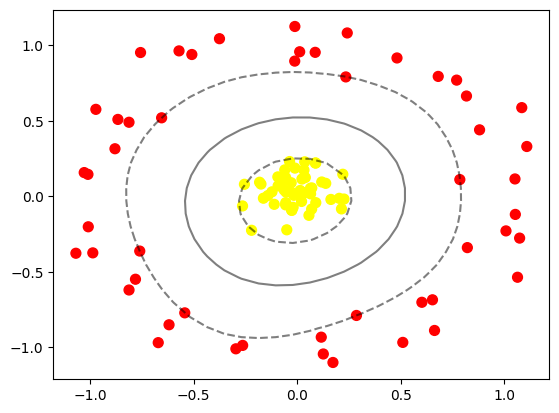

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **Lab 3**

> SVM Data Overlapping

**Pengantar**

Pada dua praktikum sebelumnya, kita sudah dapat mengatasi untuk sebaran data linier dan non-linier. Akan tetapi, jika diperhatikan, decision boundaries dapat memisahkan data secara jelas dikarenakan tidak terdapat data yang tumpang tindih (overlapping). Lalu, apa yang dapat kita lakukan ketika berhadapan dengan data yang tumpang tindih? Dalam pembuatan model pembelajaran mesin, kita mengenal istilah hyperparameter tunning. Dengan cara ini, kita dapat menyesuaikan parameter-parameter dalam model sehingga dapat mengatasi permasalahan data tumpang tindih.

## Langkah 1 - Import Library dan Buat Fungsi Plotting

In [28]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [29]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Step 2 - Langkah 2 - Buat Data Dummy

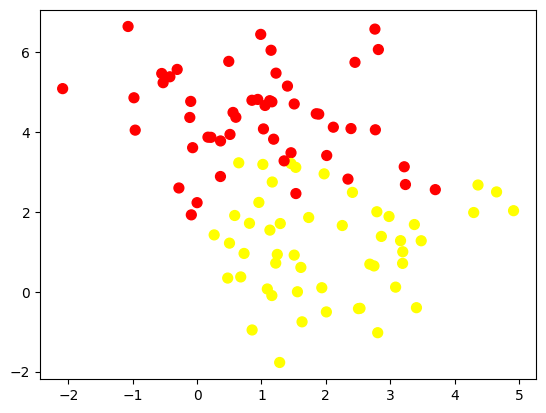

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Step 3 - Langkah 3 - Analisis Dampak Tunning

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

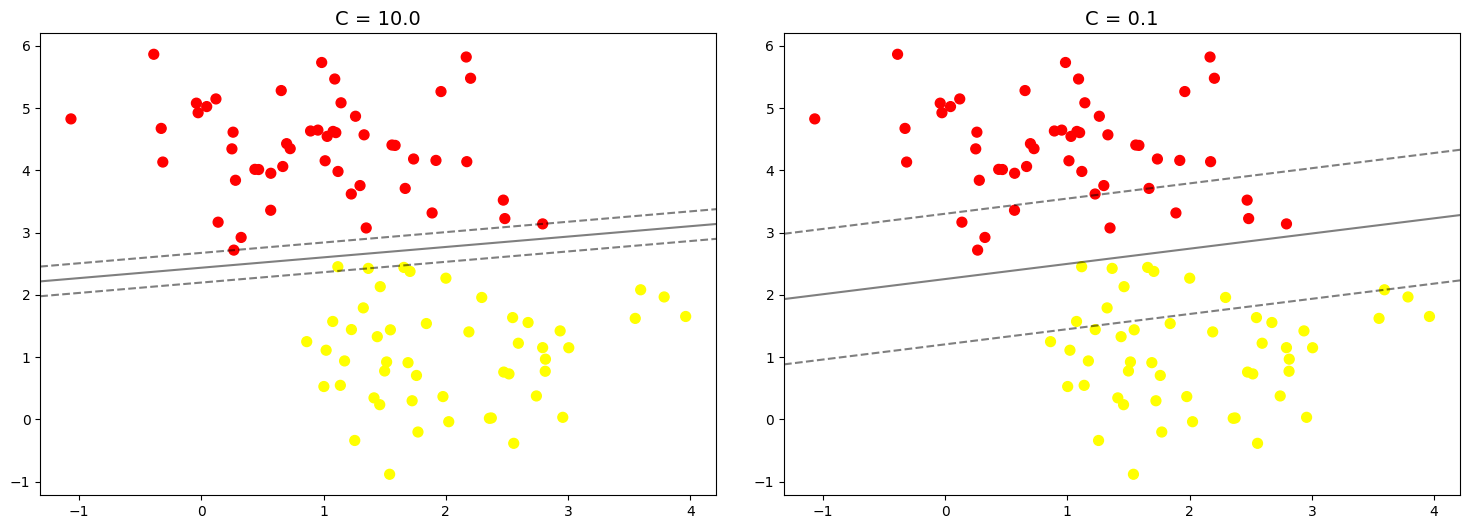

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nilai optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa).

# **Lab 4**

> Facial Image Classification

**Pengantar**

Setelah kita memahami proses klasifikasi dengan menggunakan SVM, selanjutnya kita akan belajar melakukan klasifikasi dengan data riil berupa citra wajah. Dataset yang akan digunakan adalah dataset wajah-wajah dari ribuan publik figur.

NB: Anda mungkin memerlukan waktu yang cukup lama untuk mengunduh dataset.

## Langkah 0 - Unduh Dataset

Dataset yang digunakan dapat diunduh secara langsung melalui scikit-learn.

In [32]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah

Lakukan inspeksi citra wajah yang akan digunakan.

Didapatkan ilustrasi,

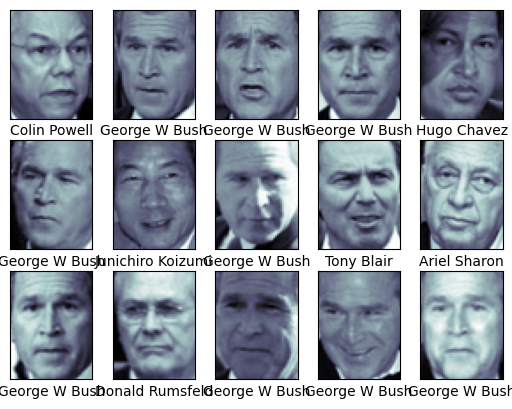

In [33]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Langkah 2 - Pra Pengolahan Data

Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [35]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Langkah 4 - Pembuatan Model + Tunning

Pada langkah ini, kita akan menyimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik GridSearch. GridSearch akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

Didapatkan,

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 24s, sys: 980 ms, total: 2min 25s
Wall time: 1min 33s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Sehingga didapatkan informasi bahwa, hyperparameter terbaik dari model SVM yang kita buat adalah dengan, C=5 dan Gamma=0.001 dengan tingkat akurasi 82.88%.

Gunakan model terbaik tersebut untuk proses prediksi.

In [37]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Langkah 5 - Cek Hasil Prediksi

Cek hasil prediksi pada citra.




Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

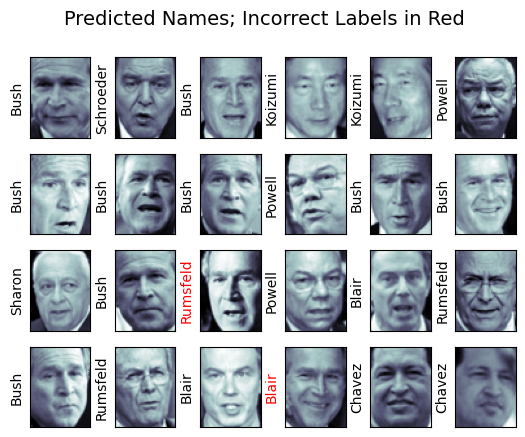

In [38]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Contoh di atas hanya menunjukkan satu data dengan label salah. Selanjutnya, kita akan mengukur performa model dengan classification report dan confusion matrix.

## Langkah 6 - Cek Performansi

Pertama, cek performansi dengan classification_report dari sklearn.

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

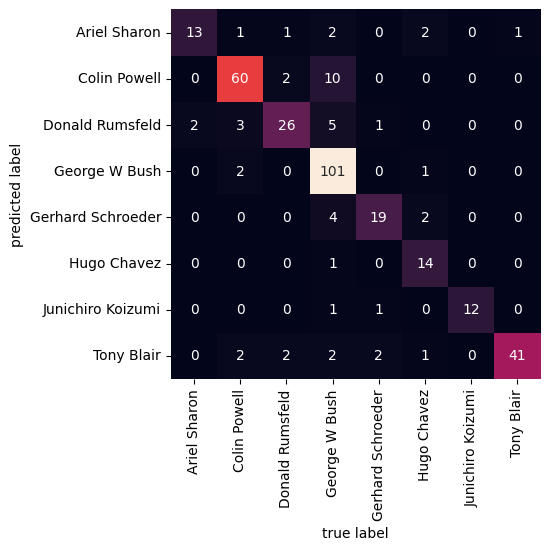

In [40]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Lab 5**

> Day and Night Image Classification

**Pengantar**

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

Unduh dataset berikut,

## Step 0 - Import Library

In [41]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [42]:
# Image directories
train_dir = "/content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images/training"
test_dir = "/content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images/test"

## Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [43]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [44]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [45]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[97, 54, 71],
         [59, 16, 33],
         [94, 51, 70],
         ...,
         [71, 51, 76],
         [62, 43, 71],
         [43, 27, 54]],
 
        [[85, 42, 59],
         [42,  0, 16],
         [83, 40, 57],
         ...,
         [32,  9, 38],
         [24,  5, 35],
         [43, 27, 56]],
 
        [[38,  0, 11],
         [94, 53, 67],
         [73, 32, 46],
         ...,
         [41, 15, 52],
         [50, 28, 66],
         [46, 26, 63]],
 
        ...,
 
        [[34,  3, 21],
         [31,  0, 15],
         [38,  6, 17],
         ...,
         [37,  9,  5],
         [43, 15, 11],
         [37,  9,  5]],
 
        [[56, 27, 32],
         [37,  8, 10],
         [44, 14, 12],
         ...,
         [37,  8,  0],
         [54, 25, 17],
         [26,  0,  0]],
 
        [[62, 38, 28],
         [47, 23, 11],
         [67, 41, 26],
         ...,
         [56, 27, 13],
         [76, 47, 33],
         [39, 11,  0]]], dtype=uint8),
 'night')

Cek ukuran gambar secara acak

In [46]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 88
(889, 1280, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [47]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (531, 800, 3)
Label	: day


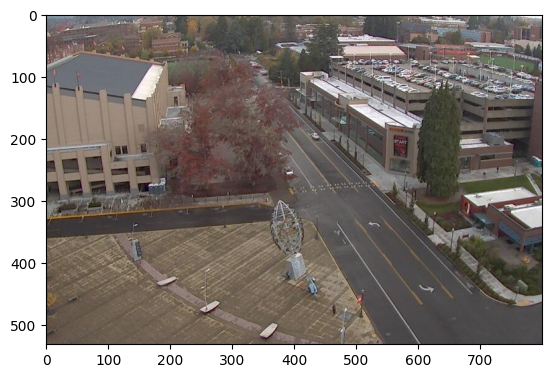

In [48]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Buatlah fungsi berikut untuk menstandarkan ukuran gambar.

In [49]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.

In [50]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [51]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

In [52]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.

In [53]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 217
(600, 1100, 3)


WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Hasilnya akan seperti gambar berikut,

In [54]:
train_std_img_list = preprocess(train_img)

Shape	: (600, 1100, 3)
Label	: day


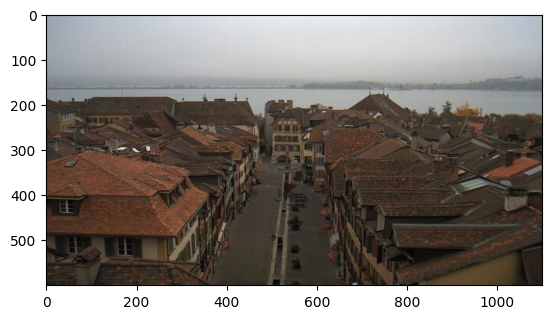

In [55]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label_str}')

random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.

In [56]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 73
Avg Brighness: 88.4099


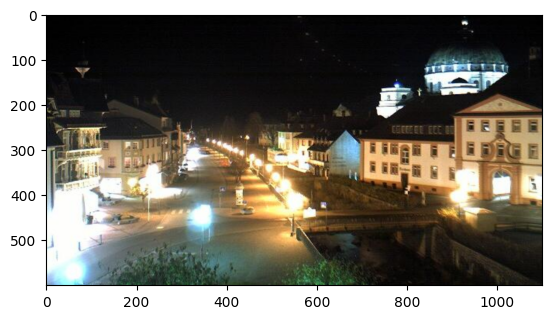

In [57]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [58]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 10
Actual label: 0
Predicted label: 0


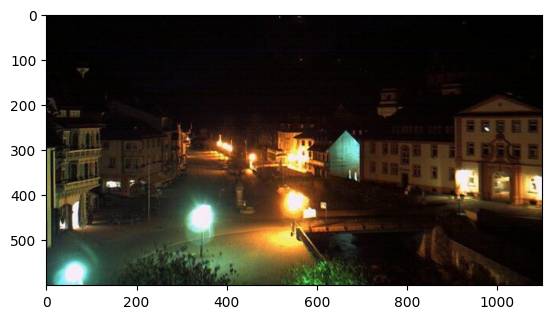

In [59]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [60]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120.

Hasilnya adalah,

In [61]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

Hasil akurasi dari data testing adalah,

In [62]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Klasifikasi dengan SVM

> Sebelumnya, kita hanya menggunakan threshold sebagai acuan. Cara ini mungkin tidak efektif dikarenakan kita harus menentukan threshold dengan tepat. Oleh karena itu, selanjutnya kita akan mencoba menggunakan model SVM untuk proses klasifikasi. Seluruh langkah yang digunakan serupa, kita hanya mengubah mulai langkah ke-4.

## Langkah 4 Alternatif - Membuat Feature Vectors.

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [63]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

Maka akan tampil output seperti pada gambar

In [64]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,101.579750,0.0
1,71.988076,0.0
2,99.043562,0.0
3,99.623588,0.0
4,35.963767,0.0


Hasilnya adalah seperti pada gambar

In [65]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,21.454098,0.0
1,106.477718,0.0
2,94.067308,0.0
3,92.665621,0.0
4,86.462873,0.0


## Langkah 5 - Buat Model SVM

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [66]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Langkah 6 - Evaluasi

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

Hasil akurasi dengan model SVM adalah,

In [67]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Lab Assignment

> 1.
Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,


a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    i. Use a model with a linear kernel.

    ii. Use a model with a polynomial kernel.

    iii. Use a model with an RBF kernel.

  b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.


> 2.
Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

# Tugas 1
1. Buat model SVM menggunakan data "voice.csv" dengan ketentuan berikut:
a. Bagi data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
i. Gunakan model dengan kernel linier.
ii. Gunakan model dengan kernel polinomial.
iii. Gunakan model dengan kernel RBF.
b. Tabulasikan performansi setiap pembagian dan kernel berdasarkan metrik akurasi.

Gunakan file data berikut:
"/content/drive/MyDrive/dataset/voice.csv"

## Langkah 0 - Muat dan siapkan data untuk bagian 1

### Subtugas:
Muat dataset `voice.csv` dan lakukan langkah-langkah pra-pemrosesan yang diperlukan.

## Langkah 2 - Latih dan evaluasi model svm untuk bagian 1 (kernel linier)

### Subtugas:
Latih model SVM dengan kernel linier untuk kedua pembagian data dan evaluasi akurasinya.

Latih model SVM dengan kernel linier untuk kedua pembagian data dan evaluasi akurasinya, ikuti instruksi dengan mengimpor pustaka yang diperlukan, membuat instance dan melatih model, membuat prediksi, dan menghitung skor akurasi.

# Tugas 2

2. Gunakan data dari "lab 5" untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan penyetelan hyperparameter dari kernel RBF. Catat performa akurasinya!

Gunakan file data berikut:
"/content/drive/MyDrive/dataset/images"


Import pandas, load the dataset, display the head, check for missing values, separate features and target, and encode the target variable as these are the necessary steps to preprocess the data.



In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/voice.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

First few rows of the dataset:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male



Missing values in the dataset:


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


## Langkah 1 - Bagi data untuk bagian 1

### Subtugas:
Bagi data yang telah diproses sebelumnya menjadi set pelatihan dan pengujian dengan rasio 70:30 dan 80:20.

In [69]:
from sklearn.model_selection import train_test_split

# Split the data with a 70:30 ratio
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Split the data with an 80:20 ratio
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data split into 70:30 ratio:")
print(f"X_train_70 shape: {X_train_70.shape}")
print(f"X_test_70 shape: {X_test_70.shape}")
print(f"y_train_70 shape: {y_train_70.shape}")
print(f"y_test_70 shape: {y_test_70.shape}")

print("\nData split into 80:20 ratio:")
print(f"X_train_80 shape: {X_train_80.shape}")
print(f"X_test_80 shape: {X_test_80.shape}")
print(f"y_train_80 shape: {y_train_80.shape}")
print(f"y_test_80 shape: {y_test_80.shape}")

Data split into 70:30 ratio:
X_train_70 shape: (2217, 20)
X_test_70 shape: (951, 20)
y_train_70 shape: (2217,)
y_test_70 shape: (951,)

Data split into 80:20 ratio:
X_train_80 shape: (2534, 20)
X_test_80 shape: (634, 20)
y_train_80 shape: (2534,)
y_test_80 shape: (634,)


## Langkah 2 - Latih dan evaluasi model svm untuk bagian 1 (kernel linier)

### Subtugas:
Latih model SVM dengan kernel linier untuk kedua pembagian data dan evaluasi akurasinya.

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate and train the first model (70:30 split)
svm_linear_70 = SVC(kernel='linear')
svm_linear_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_linear_70 = svm_linear_70.predict(X_test_70)
accuracy_linear_70 = accuracy_score(y_test_70, y_pred_linear_70)

# Instantiate and train the second model (80:20 split)
svm_linear_80 = SVC(kernel='linear')
svm_linear_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_linear_80 = svm_linear_80.predict(X_test_80)
accuracy_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Linear Kernel): {accuracy_linear_70}")
print(f"Accuracy for 80:20 split (Linear Kernel): {accuracy_linear_80}")

Accuracy for 70:30 split (Linear Kernel): 0.9263932702418507
Accuracy for 80:20 split (Linear Kernel): 0.9416403785488959


## Langkah 3 - Latih dan evaluasi model svm untuk bagian 1 (kernel polinomial)

### Subtugas:
Latih model SVM dengan kernel polinomial untuk kedua pembagian data dan evaluasi akurasinya.

In [ ]:
# Instantiate and train the first model (70:30 split) with polynomial kernel
svm_poly_70 = SVC(kernel='poly')
svm_poly_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_poly_70 = svm_poly_70.predict(X_test_70)
accuracy_poly_70 = accuracy_score(y_test_70, y_pred_poly_70)

# Instantiate and train the second model (80:20 split) with polynomial kernel
svm_poly_80 = SVC(kernel='poly')
svm_poly_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_poly_80 = svm_poly_80.predict(X_test_80)
accuracy_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Polynomial Kernel): {accuracy_poly_70}")
print(f"Accuracy for 80:20 split (Polynomial Kernel): {accuracy_poly_80}")

Accuracy for 70:30 split (Polynomial Kernel): 0.4900105152471083
Accuracy for 80:20 split (Polynomial Kernel): 0.48264984227129337


## Langkah 4 - Latih dan evaluasi model svm untuk bagian 1 (kernel rbf)

### Subtugas:
Latih model SVM dengan kernel RBF untuk kedua pembagian data dan evaluasi akurasinya.

In [ ]:
# Instantiate and train the first model (70:30 split) with RBF kernel
svm_rbf_70 = SVC(kernel='rbf')
svm_rbf_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_rbf_70 = svm_rbf_70.predict(X_test_70)
accuracy_rbf_70 = accuracy_score(y_test_70, y_pred_rbf_70)

# Instantiate and train the second model (80:20 split) with RBF kernel
svm_rbf_80 = SVC(kernel='rbf')
svm_rbf_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_rbf_80 = svm_rbf_80.predict(X_test_80)
accuracy_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (RBF Kernel): {accuracy_rbf_70}")
print(f"Accuracy for 80:20 split (RBF Kernel): {accuracy_rbf_80}")

Accuracy for 70:30 split (RBF Kernel): 0.6624605678233438
Accuracy for 80:20 split (RBF Kernel): 0.6561514195583596


## Langkah 1 - Bagi data untuk bagian 1

### Subtugas:
Bagi data yang telah diproses sebelumnya menjadi set pelatihan dan pengujian dengan rasio 70:30 dan 80:20.

## Langkah 5 - Tabulasi hasil untuk bagian 1

### Subtugas:
Buat tabel yang merangkum akurasi semua model dari Bagian 1.

In [ ]:
import pandas as pd

# Create a DataFrame to store the results
accuracy_table = pd.DataFrame({
    'Split Ratio': ['70:30', '70:30', '70:30', '80:20', '80:20', '80:20'],
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Linear', 'Polynomial', 'RBF'],
    'Accuracy': [accuracy_linear_70, accuracy_poly_70, accuracy_rbf_70, accuracy_linear_80, accuracy_poly_80, accuracy_rbf_80]
})

# Display the accuracy table
display(accuracy_table)

,Split Ratio,Kernel,Accuracy
0,70:30,Linear,0.926393
1,70:30,Polynomial,0.490011
2,70:30,RBF,0.662461
3,80:20,Linear,0.941640
4,80:20,Polynomial,0.482650
5,80:20,RBF,0.656151


# Task 2

2. Use the data from "lab 5" to create a day and night classification model using SVM with an RBF kernel using the histogram feature. Use an 80:20 ratio. You can experiment with hyperparameter tuning of the RBF kernel. Note the accuracy performance!

Use the following data files:
"/content/drive/MyDrive/dataset/images"

  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)
Menggunakan data dari direktori: /content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images

-> Memuat dan mengekstrak fitur histogram...

[INFO DATA] Data berhasil dimuat.
Total Sampel Training: 240
Total Sampel Test: 160
Dimensi Fitur per Sampel: 512 (512 fitur HSV)
--------------------------------------------------

[VISUALISASI] Contoh Gambar Training yang Digunakan:


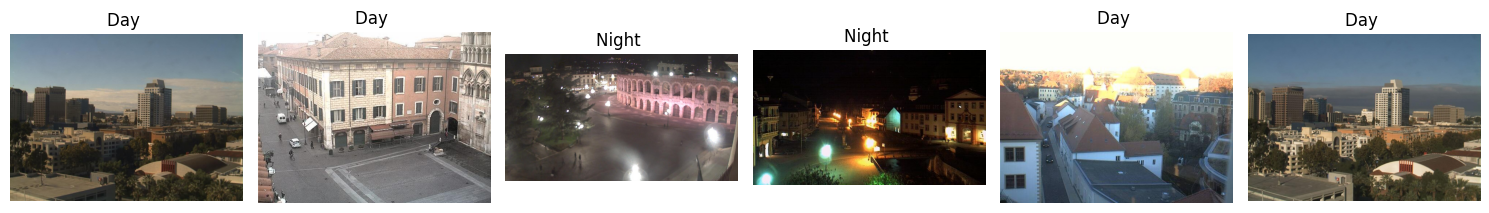


-> Melakukan Standard Scaling pada fitur...
Scaling selesai. Data siap untuk pemodelan.

-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...
Tuning selesai.

HASIL HYPERPARAMETER TUNING (GRID SEARCH)
Best Parameters: C=1, gamma=scale
Best Cross-Validation Score (Training Set): 0.9958

-> Model terbaik dievaluasi pada data TEST...

[PERFORMA FINAL TASK 2]
Accuracy Performance (Data Test): **88.12%**


In [ ]:
import numpy as np
import os
import cv2 # Untuk manipulasi gambar dan fitur histogram
import matplotlib.pyplot as plt # Untuk visualisasi
import random # Digunakan untuk sampling gambar
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- I. KONFIGURASI DAN PERSIAPAN DATA ---

# Path ke direktori utama data gambar.
PATH_IMAGES = '/content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images'


print("  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)")

print(f"Menggunakan data dari direktori: {PATH_IMAGES}\n")

# 1. Fungsi Ekstraksi Fitur Histogram (Menggunakan HSV 3D: 512 Fitur)
def extract_histogram_features(image_path, bins=(8, 8, 8)):
    """Membaca gambar, menghitung 3D histogram HSV (512 fitur), dan menormalkannya."""
    img = cv2.imread(image_path)
    if img is None:
        return None

    try:
        # Konversi BGR ke HSV. HSV lebih baik untuk menangkap perbedaan warna/kecerahan.
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    except cv2.error:
        # Jika ada error konversi (misal, file rusak), kita lewati
        return None

    # Hitung 3D histogram: 8*8*8 = 512 fitur
    hist = cv2.calcHist(
        [img_hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256]
    )

    cv2.normalize(hist, hist) # Normalisasi agar nilainya dalam rentang yang sama
    return hist.flatten()

# 2. Fungsi Memuat Data dari Folder (Memisahkan Training dan Test)
def load_data_from_subfolders_with_paths(base_path):
    """Memuat fitur, label, dan path gambar dari subfolder day/night."""
    X = []
    y = []
    paths = []

    for label_name in ['day', 'night']:
        label_path = os.path.join(base_path, label_name)
        if not os.path.isdir(label_path):
            continue

        for filename in os.listdir(label_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(label_path, filename)
                features = extract_histogram_features(image_path)

                if features is not None:
                    X.append(features)
                    y.append(0 if label_name == 'day' else 1) # Labeling: 0 = Day, 1 = Night
                    paths.append(image_path)

    return np.array(X), np.array(y), paths

# Fungsi untuk menampilkan sampel gambar
def display_loaded_images(image_paths, labels, num_images=6):
    """Menampilkan beberapa sampel gambar yang berhasil dimuat."""

    indices = np.random.choice(len(image_paths), min(num_images, len(image_paths)), replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        path = image_paths[idx]
        label = "Night " if labels[idx] == 1 else "Day "

        img = cv2.imread(path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img_rgb)
            plt.title(f"{label}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3. Muat Data Training dan Test
print("-> Memuat dan mengekstrak fitur histogram...")
X_train_h_raw, y_train_h, paths_train = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'training'))
X_test_h_raw, y_test_h, _ = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'test'))

if len(X_train_h_raw) == 0 or len(X_test_h_raw) == 0:
    print("\n[EROR FATAL] Tidak ada gambar yang berhasil dimuat. Cek path dan struktur folder.")
    exit()

print(f"\n[INFO DATA] Data berhasil dimuat.")
print(f"Total Sampel Training: {len(y_train_h)}")
print(f"Total Sampel Test: {len(y_test_h)}")
print(f"Dimensi Fitur per Sampel: {X_train_h_raw.shape[1]} (512 fitur HSV)")
print("-" * 50)

# Visualisasi Sampel
print("\n[VISUALISASI] Contoh Gambar Training yang Digunakan:")
display_loaded_images(paths_train, y_train_h, num_images=6)

# --- II. PRA-PEMROSESAN DAN PELATIHAN MODEL ---

# 4. Standard Scaling (WAJIB sebelum menggunakan SVM!)
print("\n-> Melakukan Standard Scaling pada fitur...")
scaler_hist = StandardScaler()
# Fit dan Transform HANYA pada data training
X_train_h = scaler_hist.fit_transform(X_train_h_raw)
# Transform data test menggunakan scaler yang SAMA
X_test_h = scaler_hist.transform(X_test_h_raw)
print("Scaling selesai. Data siap untuk pemodelan.")

# 5. Model SVM (RBF Kernel) dan Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10, 100], # Parameter Penalti: Mengatur seberapa keras model dihukum karena kesalahan.
    'gamma': ['scale', 0.01, 0.1, 1] # Parameter Kernel: Mengatur radius pengaruh dari satu sampel training.
}
#

svm_rbf = SVC(kernel='rbf', random_state=42)

print("\n-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...")
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_h, y_train_h)
print("Tuning selesai.")

# 6. Evaluasi Model Terbaik
best_model = grid_search.best_estimator_

# Prediksi pada data uji (data yang belum pernah dilihat)
y_pred_h = best_model.predict(X_test_h)
accuracy_final = accuracy_score(y_test_h, y_pred_h)

# --- III. PELAPORAN HASIL ---

print("\n" + "="*50)
print("HASIL HYPERPARAMETER TUNING (GRID SEARCH)")
print("="*50)
print(f"Best Parameters: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print(f"Best Cross-Validation Score (Training Set): {grid_search.best_score_:.4f}")
print("\n-> Model terbaik dievaluasi pada data TEST...")

print("\n[PERFORMA FINAL TASK 2]")
print(f"Accuracy Performance (Data Test): **{accuracy_final*100:.2f}%**")
print("==================================================")

## Ringkasan:

### Temuan Utama Analisis Data

* Untuk dataset `voice.csv`, kernel linier mencapai akurasi tertinggi dibandingkan dengan kernel polinomial dan RBF untuk kedua pembagian data.
* Dengan dataset `voice.csv`, pembagian 80:20 umumnya menghasilkan akurasi yang sedikit lebih tinggi untuk kernel linier (0,942) dan RBF (0,656) dibandingkan dengan pembagian 70:30 (linier: 0,926, RBF: 0,662).
* Kernel polinomial memiliki performa buruk untuk kedua pembagian pada dataset `voice.csv` (sekitar 0,490 untuk 70:30 dan 0,483 untuk 80:20).
* Untuk tugas klasifikasi gambar menggunakan fitur histogram, model SVM kernel RBF awal mencapai akurasi 0,9125.
* Penyetelan hyperparameter untuk kernel RBF pada data gambar tidak meningkatkan akurasi awal, dengan akurasi terbaik yang ditemukan selama penyetelan adalah 0,4875 dengan C=1 dan gamma=0,001.

### Wawasan atau Langkah Selanjutnya

* Untuk tugas klasifikasi suara, pertimbangkan untuk berfokus pada kernel linier dan potensi untuk mengeksplorasi teknik pra-pemrosesan data atau pemilihan fitur yang berbeda untuk lebih meningkatkan akurasi.
* Untuk tugas klasifikasi gambar, selidiki mengapa penyetelan hyperparameter menghasilkan akurasi yang lebih rendah. Ini bisa melibatkan eksplorasi rentang nilai C dan gamma yang lebih luas, menggunakan pendekatan penyetelan yang lebih sistematis seperti GridSearchCV, atau mempertimbangkan metode ekstraksi fitur alternatif selain histogram.